<a href="https://colab.research.google.com/github/Anitha0511/Supervised-Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Use the diabetes.csv data for the following questions, Don’t perform any Data cleaning or pre-processing before answering the question. What is the entropy of the column Blood Pressure post converting the column into categorical column using the conditions BP < 80 -> Low Pressure, BP >= 80 and BP <= 120 -> Normal, BP > 120 -> High Pressure?

In [ ]:
blood_pressure = df['BloodPressure']

In [ ]:
value_counts = blood_pressure.value_counts()

In [ ]:
value_counts

,count
BloodPressure,
70,57
74,52
78,45
68,45
72,44
64,43
80,40
76,39
60,37


In [ ]:
probabilities = value_counts / len(blood_pressure)

In [ ]:
probabilities

,count
BloodPressure,
70,0.074219
74,0.067708
78,0.058594
68,0.058594
72,0.057292
64,0.055990
80,0.052083
76,0.050781
60,0.048177


In [ ]:
from scipy.stats import entropy

In [ ]:
# Calculate the entropy
entropy_value = entropy(probabilities, base=2)
print(f"Entropy of the Blood Pressure column: {entropy_value:.2f}")

Entropy of the Blood Pressure column: 4.79


16) Write python code to get the below bar chart with the column Pregnancies and outcome?

<Axes: xlabel='Pregnancies', ylabel='count'>

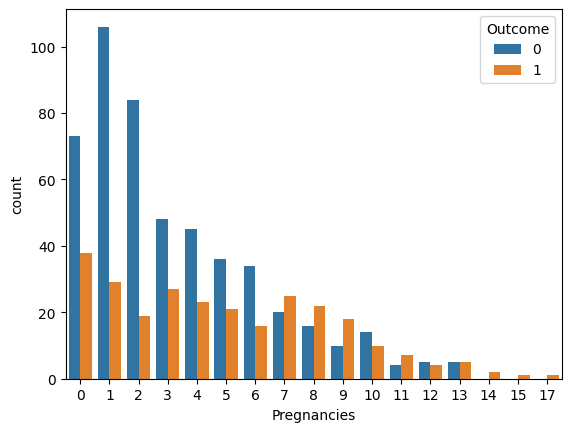

In [ ]:
pregancy_data=df.groupby(['Pregnancies','Outcome'])['Outcome'].count().reset_index(name="count")
sns.barplot(data=pregancy_data,x='Pregnancies',y='count',hue='Outcome')

 Which column has the highest entropy excluding the target column Outcome in the original data?

Independent features – Pregnancies & BloodPressure Dependent feature – Outcome Split train and test with split size as 0.2 and random state as 24 Fit the model with random_state=8 and get accuracy with test data. Get the accuracy of 0.59090909. Calculate the precision using the confusion matrix for the developed model?

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
col = ['Pregnancies', 'BloodPressure']


In [ ]:
x = df[col]
y = df['Outcome']

In [ ]:
from re import X
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)


In [ ]:
#initialise the classifier
from sklearn.tree import DecisionTreeClassifier
lr=DecisionTreeClassifier()
lr.fit(X_train,y_train)
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

In [ ]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.7996742671009772
0.5844155844155844


In [ ]:
print (confusion_matrix(y_test,y_pred_test))

[[74 24]
 [40 16]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70        98
           1       0.40      0.29      0.33        56

    accuracy                           0.58       154
   macro avg       0.52      0.52      0.52       154
weighted avg       0.56      0.58      0.57       154



In [ ]:
from re import X
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [ ]:
#initialise the classifier
from sklearn.tree import DecisionTreeClassifier
lr=DecisionTreeClassifier()
lr.fit(X_train,y_train)
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

In [ ]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.7850162866449512
0.6753246753246753


In [ ]:
print (confusion_matrix(y_test,y_pred_test))

[[84 20]
 [30 20]]


In [ ]:
# helper function
def plot_confusionmatrix(predict,actual,label):
    print(f'{label} Confusion matrix')
    cf = confusion_matrix(predict,actual)
    sns.heatmap(cf,annot=True,fmt='G') # fmt is used here for the chart title
    plt.show()

Train Confusion matrix


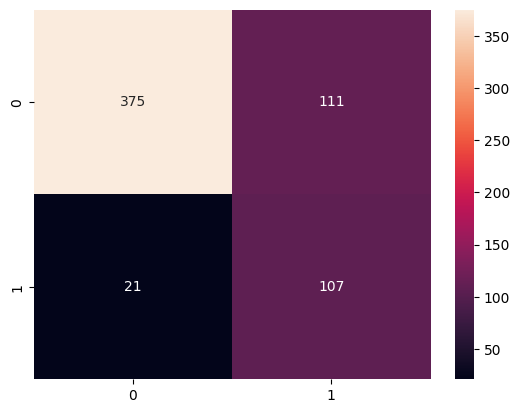

In [ ]:
plot_confusionmatrix(y_pred_train,y_train,'Train')

Test Confusion matrix


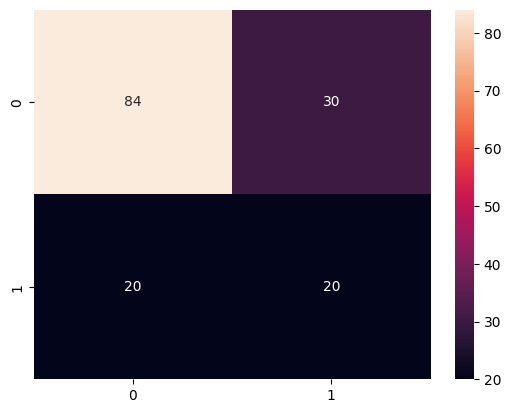

In [ ]:
plot_confusionmatrix(y_pred_test,y_test,'Test')